># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
> ##  <font color="green">In Lab Task # 02</font>
> ###  <font color="yellow">Group # 01</font>


🧪 Lab Exercise: Data Analysis with Pandas, Matplotlib, and Seaborn

---


*Dataset*: [BMW Worldwide Sales Records (2010–2024)](https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024/data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load the dataset into a Pandas DataFrame and display:
- The first 10 rows

- The shape (number of rows and columns)

- The column names and their data types

- The number of missing values in each column

In [ ]:
data= pd.read_csv("/content/BMW sales data (2010-2024) (1).csv")
print(data.head(10))
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())

      Model  Year         Region   Color Fuel_Type Transmission  \
0  5 Series  2016           Asia     Red    Petrol       Manual   
1        i8  2013  North America     Red    Hybrid    Automatic   
2  5 Series  2022  North America    Blue    Petrol    Automatic   
3        X3  2024    Middle East    Blue    Petrol    Automatic   
4  7 Series  2020  South America   Black    Diesel       Manual   
5  5 Series  2017    Middle East  Silver    Diesel       Manual   
6        i8  2022         Europe   White    Diesel       Manual   
7        M5  2014           Asia   Black    Diesel    Automatic   
8        X3  2016  South America   White    Diesel    Automatic   
9        i8  2019         Europe   White  Electric       Manual   

   Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0            3.5      151748      98740          8300                 High  
1            1.6      121671      79219          3428                  Low  
2            4.5       10991   

Q2. Create new a sub-dataframe from your original dataframe which does not include sales,country, and year

In [ ]:
subdataframe=data.drop(['Sales_Volume','Region','Year'],axis=1)
print(subdataframe)

          Model   Color Fuel_Type Transmission  Engine_Size_L  Mileage_KM  \
0      5 Series     Red    Petrol       Manual            3.5      151748   
1            i8     Red    Hybrid    Automatic            1.6      121671   
2      5 Series    Blue    Petrol    Automatic            4.5       10991   
3            X3    Blue    Petrol    Automatic            1.7       27255   
4      7 Series   Black    Diesel       Manual            2.1      122131   
...         ...     ...       ...          ...            ...         ...   
49995        i3     Red    Hybrid       Manual            4.6      151030   
49996        i3  Silver  Electric       Manual            4.2      147396   
49997  5 Series     Red    Petrol    Automatic            4.5      174939   
49998        i3   White  Electric    Automatic            3.8        3379   
49999        X1    Blue    Diesel       Manual            3.3      171003   

       Price_USD Sales_Classification  
0          98740                 Hi

Q.3 Display only the colums 1-4 and last 500 rows

In [ ]:
subdataframe=data.iloc[-500:,:4]
print(subdataframe)

          Model  Year         Region   Color
49500  7 Series  2014           Asia    Grey
49501        X1  2023         Africa  Silver
49502  7 Series  2017    Middle East    Blue
49503        i3  2017         Europe    Blue
49504  5 Series  2014         Europe     Red
...         ...   ...            ...     ...
49995        i3  2014           Asia     Red
49996        i3  2023    Middle East  Silver
49997  5 Series  2010    Middle East     Red
49998        i3  2020           Asia   White
49999        X1  2020  North America    Blue

[500 rows x 4 columns]


Q4. Display a summary of descriptive statistics for numerical columns

In [ ]:
print(subdataframe.describe())

              Year
count   500.000000
mean   2016.614000
std       4.214799
min    2010.000000
25%    2013.000000
50%    2016.000000
75%    2020.000000
max    2024.000000


Q5. Find and display the total number of sales for each year


In [ ]:
print(data.groupby('Year')['Sales_Volume'].sum())

Year
2010    16933445
2011    16758941
2012    16751895
2013    16866733
2014    16958960
2015    17010207
2016    16957550
2017    16620811
2018    16412273
2019    17191956
2020    16310843
2021    16884666
2022    17920946
2023    16268654
2024    17527854
Name: Sales_Volume, dtype: int64


Q6. Find and display top 3 countries by total BMW sales

In [ ]:
top = data.groupby('Region')['Sales_Volume'].sum().nlargest(3)
print(top)

Region
Asia             42974277
Europe           42555138
North America    42402629
Name: Sales_Volume, dtype: int64


Q7. Which year had the higest total sales?

In [ ]:
highest_sales_year = data.groupby('Year')['Sales_Volume'].sum().nlargest()
print(highest_sales_year)

Year
2022    17920946
2024    17527854
2019    17191956
2015    17010207
2014    16958960
Name: Sales_Volume, dtype: int64


Q8. Which country recorded the maximum sales overall?

In [ ]:
maximum = data.groupby('Region')['Sales_Volume'].sum().nlargest()
print(maximum)

Region
Asia             42974277
Europe           42555138
North America    42402629
Middle East      42326620
Africa           41565252
Name: Sales_Volume, dtype: int64


Using Matplotlib, create a line chart showing total BMW sales from 2010 to 2024.
- X-axis -> Year
- Y-axis -> Total Sales

*Include title and axis Labels*

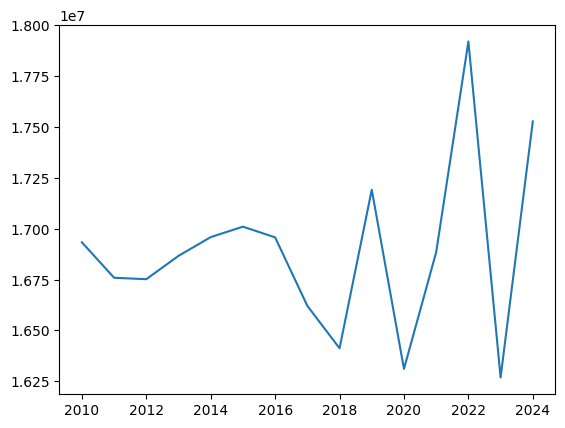

In [ ]:
linechart=data.groupby('Year')['Sales_Volume'].sum()
plt.plot(linechart.index,linechart.values)

Q9. Create a horizontal bar chart to display the Top 5 Countries by total BMW sales.

Label the bars clearly.

<BarContainer object of 5 artists>

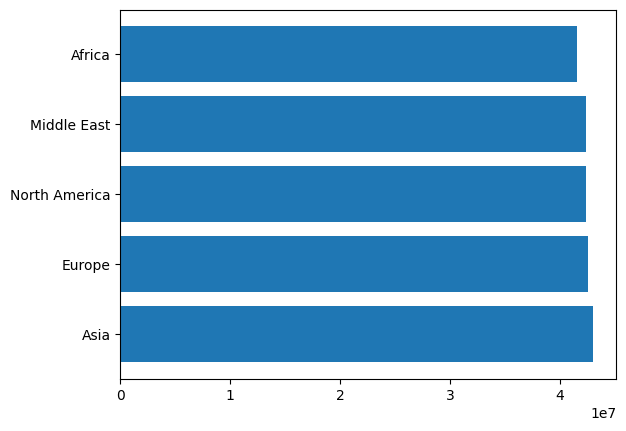

In [ ]:
horizontal = data.groupby('Region')['Sales_Volume'].sum().nlargest(5)
plt.barh(horizontal.index,horizontal.values)

Q10. Create a heatmap showing the correlation between all numeric columns in the dataset.
- Add color gradients
- Annotate the correlation values

Which variables appear to be most correlated with Sales?


<Axes: >

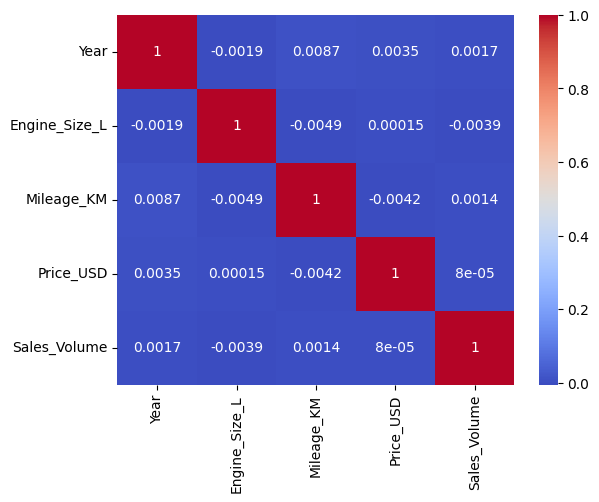

In [ ]:
numeric_cols = data.select_dtypes(include=['number'])
correlates = numeric_cols.corr()
sns.heatmap(correlates, annot=True, cmap='coolwarm')

Q10. Using a box plot, visualize the distribution of sales across different regions.

What can you infer from the variation among regions?

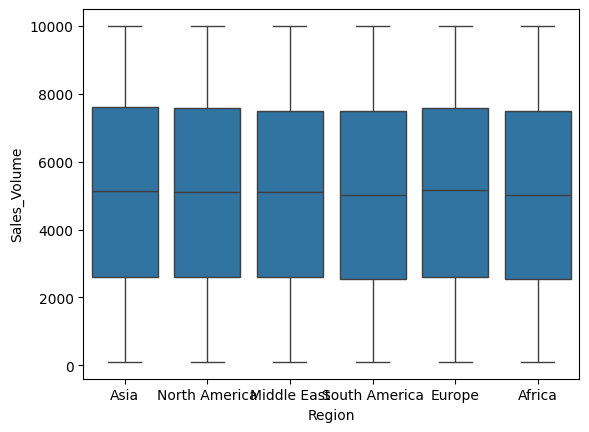

In [ ]:
boxplot = sns.boxplot(x='Region', y='Sales_Volume', data=data)

Q11. Use a pair plot to explore the relationships between the following columns:
- Sales
- Revenue
- MarketShare

What trends or relationships do you observe?

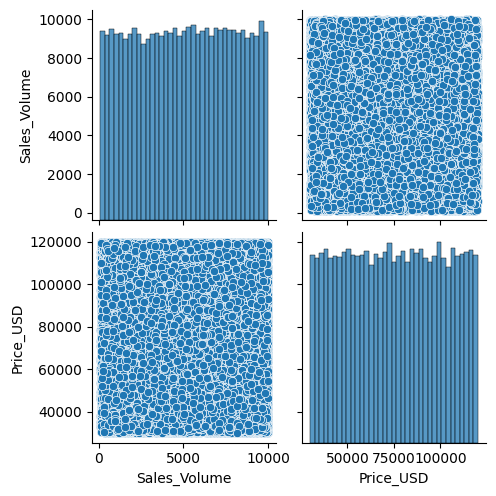

In [ ]:
sns.pairplot(data[['Sales_Volume', 'Price_USD']])
plt.show()